# Name: Yash Bhargava
# RollNo: 2115500160(53)
# Section: T

# Importing the requires modules and functions.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error, explained_variance_score

In [30]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Checking if their exists any null value in dataSet.
# isnull() methods checks whether the value is null or not. If the value is null it returns false and true if value is null.
# sum() adds up the true values. But their is no null value in dataset so it will sum to 0. 

In [31]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# describe(): It gives all the statistical information about data like counting of non nan records, mean, standard deviation, minimum value, maximum value & percentiles.

In [33]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Visualizing data with scatter plot and show.

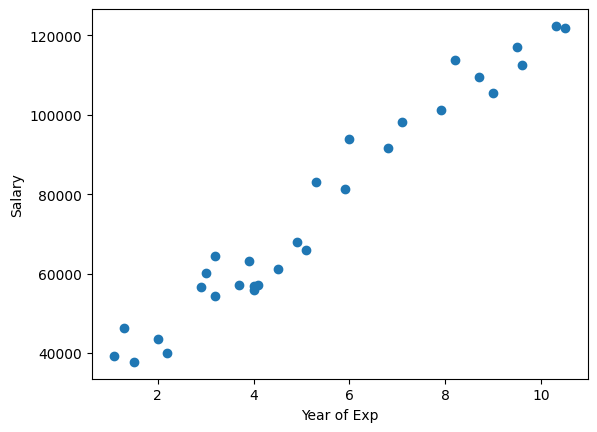

In [34]:
plt.scatter( df['YearsExperience'] ,df['Salary'] )
plt.xlabel('Year of Exp')
plt.ylabel('Salary')
plt.show()

# Prepare data, separating the independent and dependent variable as X and y.

In [35]:
X = df.iloc[:, :-1]
y = df.iloc[:, 1:]

In [36]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [37]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [38]:
X.shape, y.shape

((30, 1), (30, 1))

# Splitting data into training and testing data

In [39]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state = 0, test_size = 0.30)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((21, 1), (9, 1), (21, 1), (9, 1))

# Creating LinearRegression Object

In [40]:
lr = LinearRegression()

# Creating Regression Model

In [41]:
lr.fit(X_train, Y_train)

LinearRegression()

# Testing model

In [42]:
pred = lr.predict(X_test)
pred  # Predicted Output


array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [43]:
Y_test # Actual Testing data output

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0


## Checking Actual data , Predicted data and difference between the Actual and Predicted data

In [44]:
diff = Y_test - pred
diff = diff.to_numpy().flatten()    # Converting the 2D arrays to 1D
Y_test = Y_test.to_numpy().flatten()

In [45]:
pred = pd.DataFrame(pred)
pred = pred.to_numpy().flatten()
diff.ndim, Y_test.ndim, pred.ndim

(1, 1, 1)

Concatenating Actual data, Predicted data and Difference between them

In [46]:
x = pd.concat([pd.Series(pred), pd.Series(Y_test), pd.Series(diff)], keys = ['Actual','Predicted','Difference'], axis = 1)
x

,Actual,Predicted,Difference
0,40817.783270,37731.0,-3086.783270
1,123188.082589,122391.0,-797.082589
2,65154.462615,57081.0,-8073.462615
3,63282.410357,63218.0,-64.410357
4,115699.873560,116969.0,1269.126440
5,108211.664531,109431.0,1219.335469
6,116635.899689,112635.0,-4000.899689
7,64218.436486,55794.0,-8424.436486
8,76386.776158,83088.0,6701.223842


## Visualize Model, that how it is performing on training data

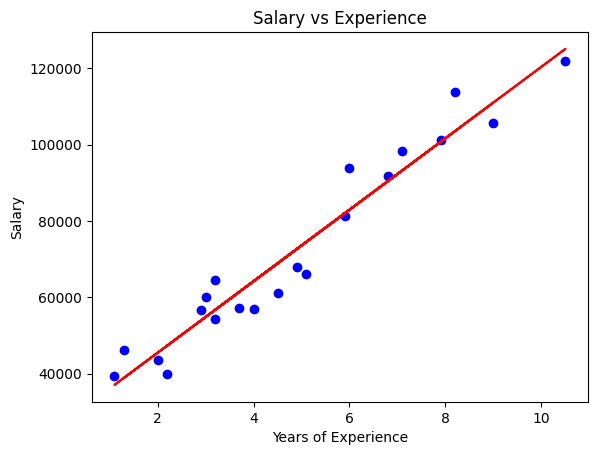

In [47]:
plt.scatter(X_train , Y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

## Visualize Model, that how it is performing on testing data

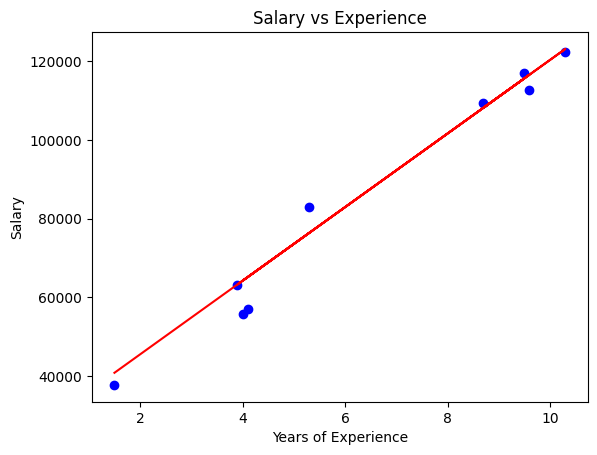

In [48]:
plt.scatter(X_test , Y_test,color = 'blue')
plt.plot(X_test ,lr.predict(X_test) ,color = 'red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [49]:
rmse = round(np.sqrt(mean_squared_error(Y_test,pred)), 2)
var_score = round(explained_variance_score(Y_test, pred), 2)
r2 = round(r2_score(Y_test,pred), 2)

In [50]:
print(f"Root Mean Squared Error: {rmse}")
print(f"Explained Variance Score: {var_score}")
print(f"R2 Score: {r2}")

Root Mean Squared Error: 4834.26
Explained Variance Score: 0.98
R2 Score: 0.97


In [51]:
exp = 3
lr.predict([[exp]])[0][0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

Salary of 3 year experience employee = 54858 thousands


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
exp = 5
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

Salary of 5 year experience employee = 73578 thousands


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
